<center>
<img src="images/vector_head.png" width=500 align="center" />
</center>

## Introduction to Geopandas

### Importing geospatial data

Geospatial data is available from specific GIS file formats or data stores, like ESRI shapefiles, GeoJSON files, geopackage files, PostGIS (PostgreSQL) database ...

In order to read, write and manipulate geospatial data we can use the GeoPandas library to read many of those GIS file formats.

gpd.read_file is the workhorse for reading GIS files. It leverages the fiona package.

In order to dive deeper into geopandas we first need data. For this purpouse we will use the Natural Earth dataset

"Natural Earth is a public domain map dataset available at 1:10m, 1:50m, and 1:110 million scales. Featuring tightly integrated vector and raster data, with Natural Earth you can make a variety of visually pleasing, well-crafted maps with cartography or GIS software."* 

A subset comes bundled with GeoPandas and is accessible from the gpd.datasets module. We'll use it as a helpful global base layer map.

### https://towardsdatascience.com/lets-make-a-map-using-geopandas-pandas-and-matplotlib-to-make-a-chloropleth-map-dddc31c1983d

<AxesSubplot:>

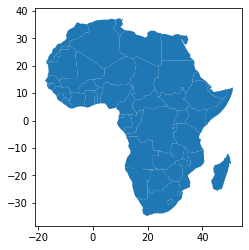

In [1]:
import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#https://geopandas.readthedocs.io/en/latest/docs/user_guide/io.html
#https://stackoverflow.com/questions/51621615/which-geopandas-datasets-maps-are-available
africa = world[world['continent']=='Africa']
africa.plot()

In [3]:
africa

pop_est continent                  name iso_a3  gdp_md_est  \
1     53950935    Africa              Tanzania    TZA    150600.0   
2       603253    Africa             W. Sahara    ESH       906.5   
11    83301151    Africa       Dem. Rep. Congo    COD     66010.0   
12     7531386    Africa               Somalia    SOM      4719.0   
13    47615739    Africa                 Kenya    KEN    152700.0   
14    37345935    Africa                 Sudan    SDN    176300.0   
15    12075985    Africa                  Chad    TCD     30590.0   
25    54841552    Africa          South Africa    ZAF    739100.0   
26     1958042    Africa               Lesotho    LSO      6019.0   
48    13805084    Africa              Zimbabwe    ZWE     28330.0   
49     2214858    Africa              Botswana    BWA     35900.0   
50     2484780    Africa               Namibia    NAM     25990.0   
51    14668522    Africa               Senegal    SEN     39720.0   
52    17885245    Africa                  Mali    MLI     38090.0   
53     3758571    Africa            Mauritania    MRT     16710.0   
54    11038805    Africa                 Benin    BEN     24310.0   
55    19245344    Africa                 Niger    NER     20150.0   
56   190632261    Africa               Nigeria    NGA   1089000.0   
57    24994885    Africa              Cameroon    CMR     77240.0   
58     7965055    Africa                  Togo    TGO     11610.0   
59    27499924    Africa                 Ghana    GHA    120800.0   
60    24184810    Africa         Côte d'Ivoire    CIV     87120.0   
61    12413867    Africa                Guinea    GIN     16080.0   
62     1792338    Africa         Guinea-Bissau    GNB      2851.0   
63     4689021    Africa               Liberia    LBR      3881.0   
64     6163195    Africa          Sierra Leone    SLE     10640.0   
65    20107509    Africa          Burkina Faso    BFA     32990.0   
66     5625118    Africa  Central African Rep.    CAF      3206.0   
67     4954674    Africa                 Congo    COG     30270.0   
68     1772255    Africa                 Gabon    GAB     35980.0   
69      778358    Africa            Eq. Guinea    GNQ     31770.0   
70    15972000    Africa                Zambia    ZMB     65170.0   
71    19196246    Africa                Malawi    MWI     21200.0   
72    26573706    Africa            Mozambique    MOZ     35010.0   
73     1467152    Africa              eSwatini    SWZ     11060.0   
74    29310273    Africa                Angola    AGO    189000.0   
75    11466756    Africa               Burundi    BDI      7892.0   
78    25054161    Africa            Madagascar    MDG     36860.0   
80     2051363    Africa                Gambia    GMB      3387.0   
81    11403800    Africa               Tunisia    TUN    130800.0   
82    40969443    Africa               Algeria    DZA    609400.0   
154    5918919    Africa               Eritrea    ERI      9169.0   
162   33986655    Africa               Morocco    MAR    282800.0   
163   97041072    Africa                 Egypt    EGY   1105000.0   
164    6653210    Africa                 Libya    LBY     90890.0   
165  105350020    Africa              Ethiopia    ETH    174700.0   
166     865267    Africa              Djibouti    DJI      3345.0   
167    3500000    Africa            Somaliland    -99     12250.0   
168   39570125    Africa                Uganda    UGA     84930.0   
169   11901484    Africa                Rwanda    RWA     21970.0   
176   13026129    Africa              S. Sudan    SSD     20880.0   

                                              geometry  
1    POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2    POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
11   POLYGON ((29.34000 -4.49998, 29.51999 -5.41998...  
12   POLYGON ((41.58513 -1.68325, 40.99300 -0.85829...  
13   POLYGON ((39.20222 -4.67677, 37.76690 -3.67712...  
14   POLYGON ((24.56737 8.22919, 23.80581 8.66632, ...  
15   POLYGON ((23.8

Let’s see what datatype is our ‘data’

In [4]:
# View object type
type(world)

geopandas.geodataframe.GeoDataFrame

If you've never seen a **GeoDataFrame**, it is quite simple: 

- A **GeoDataFrame** is similar to a normal **DataDrame** in **Pandas** 

- **Only difference**: it has a 'geometry' column 

- it comes additional functionality for working with geospatial data. 

<center>
<img src="images/geoframe.png" width=500  />
</center>

Let’s take a look at our data and print the first 5 rows using the

In [3]:
# View  the top 6 lines of attribute table of data
africa.head(6)

pop_est continent             name iso_a3  gdp_md_est  \
1   53950935    Africa         Tanzania    TZA    150600.0   
2     603253    Africa        W. Sahara    ESH       906.5   
11  83301151    Africa  Dem. Rep. Congo    COD     66010.0   
12   7531386    Africa          Somalia    SOM      4719.0   
13  47615739    Africa            Kenya    KEN    152700.0   
14  37345935    Africa            Sudan    SDN    176300.0   

                                             geometry  
1   POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2   POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
11  POLYGON ((29.34000 -4.49998, 29.51999 -5.41998...  
12  POLYGON ((41.58513 -1.68325, 40.99300 -0.85829...  
13  POLYGON ((39.20222 -4.67677, 37.76690 -3.67712...  
14  POLYGON ((24.56737 8.22919, 23.80581 8.66632, ...

In [6]:
tan = africa[africa['name']=='Tanzania']
tan.plot()
tan['geometry']

1    POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...
Name: geometry, dtype: geometry

### Geometry

Vector data contains discrete geometric locations (x, y) known as vertices that define the shape of the spatial object and attributes (also known as properties or characteristics). Spatial vector data can consist of different types, and the 3 fundamental types are: 

**Points** (0-dimensional): Each individual point is defined by a single x, y coordinate. There can be many points in a vector point file. 
(e.g. GPS-coordinates, city locations, sample points ...)

**Lines** (1-dimensional): A line is composed of a sequence of two or more coordinate pairs. 
(e.g. roads, rivers, contour line ...)

**Polygons** (2-dimensional): A polygon is composed of one or more lines whose starting and ending coordinate pairs are the same. 
(e.g. boundary of countries, lakes, fields ...) 



<center>
<img src="images/vector.png" width=800  />
</center>

### The shapely library
Geopandas takes advantage of Shapely’s geometric objects. The geometries for each spatial object is stored in a column called geometry.Python has a specific module called Shapely that can be used to create and work with Geometric Objects.

In [2]:
print(type(world.geometry[0]))
world.geometry

<class 'shapely.geometry.multipolygon.MultiPolygon'>


0      MULTIPOLYGON (((180.00000 -16.06713, 180.00000...
1      POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...
2      POLYGON ((-8.66559 27.65643, -8.66512 27.58948...
3      MULTIPOLYGON (((-122.84000 49.00000, -122.9742...
4      MULTIPOLYGON (((-122.84000 49.00000, -120.0000...
                             ...                        
172    POLYGON ((18.82982 45.90887, 18.82984 45.90888...
173    POLYGON ((20.07070 42.58863, 19.80161 42.50009...
174    POLYGON ((20.59025 41.85541, 20.52295 42.21787...
175    POLYGON ((-61.68000 10.76000, -61.10500 10.890...
176    POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...
Name: geometry, Length: 177, dtype: geometry

There are many useful functionalities that you can do with Shapely such as:

- Create a Line or Polygon from a Collection of Point geometries
- Calculate areas/length/bounds etc.
- Geometric operations based on the input geometries such as Union, Difference, Distance
- Conduct spatial queries between geometries such Intersects, Touches, Crosses, Within 


Of course we can use the shapely library to construct our own vector data

### Points

In [3]:
from shapely.geometry import Point, Polygon, LineString

p = Point(4, 5)
p.x
p.y

5.0

In [4]:
wuerzburg = Point(52.52, 13.40)
berlin = Point(49.78, 9.93)

In [5]:
xy = wuerzburg.coords.xy
x = wuerzburg.x
y = wuerzburg.y

print(xy,x,y)

(array('d', [52.52]), array('d', [13.4])) 52.52 13.4


In [8]:
point_dist = wuerzburg.distance(berlin)
print("Distance between the points is {0:.2f} decimal degrees".format(point_dist))

Distance between the points is 4.42 decimal degrees


### Lines

In [9]:
line = LineString([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

print("Length of our line: {0:.2f}".format(line.length))
print("Centroid of our line: ", line.centroid)


Length of our line: 52.46
Centroid of our line:  POINT (6.229961354035622 -11.89241115757239)


### Polygons

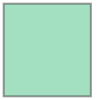

In [8]:

wuerzburg = Polygon([(9.85, 49.69), (10.01,49.69), (10.01,49.86), (9.85, 49.86)])
wuerzburg

In [9]:
print("Würzburg centroid: ", wuerzburg.centroid)
print("Würzburg Area: ", wuerzburg.area)
print("Würzburg Bounding Box: ", wuerzburg.bounds)
print("Würzburg Exterior: ", wuerzburg.exterior)
print("Würzburg Exterior Length: ", wuerzburg.exterior.length)

Würzburg centroid:  POINT (9.93 49.77499999999999)
Würzburg Area:  0.027200000000000297
Würzburg Bounding Box:  (9.85, 49.69, 10.01, 49.86)
Würzburg Exterior:  LINEARRING (9.85 49.69, 10.01 49.69, 10.01 49.86, 9.85 49.86, 9.85 49.69)
Würzburg Exterior Length:  0.6600000000000037


And of course we can also create a geopandas dataframe

In [12]:
gdf = gpd.GeoDataFrame({
      'geometry': Polygon([(9.85, 49.69), (10.01,49.69), (10.01,49.86), (9.85, 49.86)]),
      'Name': ['Wuerzburg'],
      'population': [127.934]})
gdf

geometry       Name  population
0  POLYGON ((9.85000 49.69000, 10.01000 49.69000,...  Wuerzburg     127.934

### Data handling

The fact that our dataset is basically a pandas dataframe with additional information, we can apply pandas functions we already have learned. So we have all the pandas functionality available to use on the geospatial dataset, and to do data manipulations with the attributes and geometry information together.

In [10]:
world.columns

Index(['pop_est', 'continent', 'name', 'iso_a3', 'gdp_md_est', 'geometry'], dtype='object')

<AxesSubplot:>

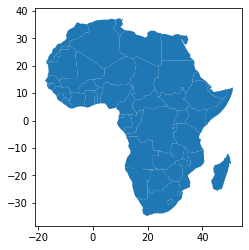

In [11]:
africa = world[world['continent']=='Africa']
africa.plot()

<AxesSubplot:>

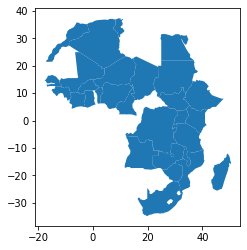

In [12]:
pop = africa[africa['pop_est'] >= 10000000 ]
pop
pop.plot()

Fortunately, geopandas has already a function which allows us to write our results as Shapefile

In [13]:
africa.to_file("../Data/vector/africa.shp")
#help(africa.to_file)

Of course GeoPandas provides additional functions for spatial analysis. We can iterate over the selected rows using a specific .iterrows() -function in (geo)pandas and print the area for each polygon:

In [17]:
for index, row in africa.iterrows():
    poly_area = row['geometry'].area
    print("Polygon area at index {0} is: {1:.3f}".format(africa['name'][index], poly_area))

Polygon area at index Tanzania is: 76.302
Polygon area at index W. Sahara is: 8.604
Polygon area at index Dem. Rep. Congo is: 189.515
Polygon area at index Somalia is: 39.528
Polygon area at index Kenya is: 48.033
Polygon area at index Sudan is: 156.445
Polygon area at index Chad is: 107.167
Polygon area at index South Africa is: 112.719
Polygon area at index Lesotho is: 2.562
Polygon area at index Zimbabwe is: 32.280
Polygon area at index Botswana is: 51.838
Polygon area at index Namibia is: 72.336
Polygon area at index Senegal is: 16.292
Polygon area at index Mali is: 105.097
Polygon area at index Mauritania is: 91.129
Polygon area at index Benin is: 9.641
Polygon area at index Niger is: 100.560
Polygon area at index Nigeria is: 74.592
Polygon area at index Cameroon is: 37.607
Polygon area at index Togo is: 5.007
Polygon area at index Ghana is: 19.974
Polygon area at index Côte d'Ivoire is: 27.033
Polygon area at index Guinea is: 19.786
Polygon area at index Guinea-Bissau is: 3.003
P

Beware that these area calculations are in the native degrees units, which is fairly useless

### CRS

A coordinate reference system (CRS) determines how the two-dimensional (planar) coordinates of the geometry objects should be related to actual places on the (non-planar) earth. The EPSG number (“European Petroleum Survey Group”) is a code that tells about the coordinate system of the dataset.You can find a lot of information about different available coordinate reference systems from:

www.spatialreference.org

<center>
<img src="images/crs.png" width=800  />
</center>

In [18]:
# View CRS of object
africa.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<center>
<img src="images/projected.png" width=700 />
</center>

Changing the projection is really easy to do in Geopandas with .to_crs() -function. As an input for the function, you should define the column containing the geometries, i.e. geometry in this case, and a epgs value of the projection that you want to use.

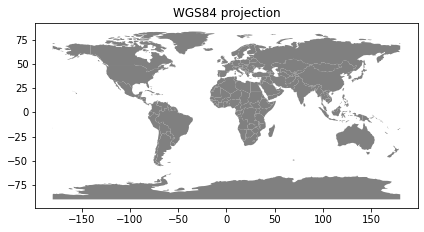

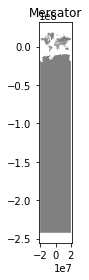

In [2]:
import matplotlib.pyplot as plt

# We can use just the EPSG code

mercator = world.to_crs("EPSG:3395")
# mecator['geometry']
world.plot(facecolor='gray');
plt.title("WGS84 projection");
plt.tight_layout()

mercator.plot(facecolor='grey');
plt.title("Mercator");
plt.tight_layout()


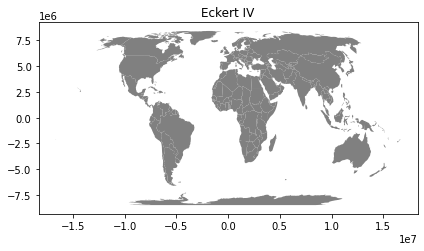

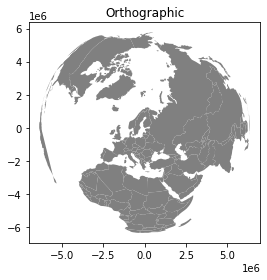

In [3]:
# Or use the a proj4 definition
from pyproj import CRS

eckert_IV = CRS.from_proj4("+proj=eck4 +lon_0=0 +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m +no_defs")
ortho = CRS.from_proj4("+proj=ortho +lat_0=60.00 +lon_0=23.0000 +x_0=0 +y_0=0 +a=6370997 +b=6370997 +units=m +no_defs")

eckert_world = world.to_crs(eckert_IV)
ortho_world = world.to_crs(ortho)

eckert_world .plot(facecolor='gray');
plt.title("Eckert IV");
plt.tight_layout()

ortho_world.plot(facecolor='grey');
plt.title("Orthographic");
plt.tight_layout()




Let’s convert the geometries for africa into Lambert Azimuthal Equal Area projection (EPSG: 3035) in order to get the right area. 

In [21]:
# Reprojecting data
africa_aeac = africa.to_crs('esri:102022')
africa_aeac.head()

pop_est continent             name iso_a3  gdp_md_est  \
1   53950935    Africa         Tanzania    TZA    150600.0   
2     603253    Africa        W. Sahara    ESH       906.5   
11  83301151    Africa  Dem. Rep. Congo    COD     66010.0   
12   7531386    Africa          Somalia    SOM      4719.0   
13  47615739    Africa            Kenya    KEN    152700.0   

                                             geometry  
1   POLYGON ((922537.240 -114575.437, 939987.876 -...  
2   POLYGON ((-3534685.828 3115442.123, -3534537.0...  
11  POLYGON ((448900.867 -534810.534, 467307.838 -...  
12  POLYGON ((1717804.547 -205991.843, 1657142.658...  
13  POLYGON ((1468849.544 -559808.809, 1321049.240...

In [22]:
africa['geometry'].head()
africa_aeac['geometry'].head()

1     POLYGON ((922537.240 -114575.437, 939987.876 -...
2     POLYGON ((-3534685.828 3115442.123, -3534537.0...
11    POLYGON ((448900.867 -534810.534, 467307.838 -...
12    POLYGON ((1717804.547 -205991.843, 1657142.658...
13    POLYGON ((1468849.544 -559808.809, 1321049.240...
Name: geometry, dtype: geometry

Now we can calculate the actual area for each country. This time we append the result to the dataframe

In [23]:
africa_aeac['area'] = africa_aeac.area
africa_aeac

pop_est continent                  name iso_a3  gdp_md_est  \
1     53950935    Africa              Tanzania    TZA    150600.0   
2       603253    Africa             W. Sahara    ESH       906.5   
11    83301151    Africa       Dem. Rep. Congo    COD     66010.0   
12     7531386    Africa               Somalia    SOM      4719.0   
13    47615739    Africa                 Kenya    KEN    152700.0   
14    37345935    Africa                 Sudan    SDN    176300.0   
15    12075985    Africa                  Chad    TCD     30590.0   
25    54841552    Africa          South Africa    ZAF    739100.0   
26     1958042    Africa               Lesotho    LSO      6019.0   
48    13805084    Africa              Zimbabwe    ZWE     28330.0   
49     2214858    Africa              Botswana    BWA     35900.0   
50     2484780    Africa               Namibia    NAM     25990.0   
51    14668522    Africa               Senegal    SEN     39720.0   
52    17885245    Africa                  Mali    MLI     38090.0   
53     3758571    Africa            Mauritania    MRT     16710.0   
54    11038805    Africa                 Benin    BEN     24310.0   
55    19245344    Africa                 Niger    NER     20150.0   
56   190632261    Africa               Nigeria    NGA   1089000.0   
57    24994885    Africa              Cameroon    CMR     77240.0   
58     7965055    Africa                  Togo    TGO     11610.0   
59    27499924    Africa                 Ghana    GHA    120800.0   
60    24184810    Africa         Côte d'Ivoire    CIV     87120.0   
61    12413867    Africa                Guinea    GIN     16080.0   
62     1792338    Africa         Guinea-Bissau    GNB      2851.0   
63     4689021    Africa               Liberia    LBR      3881.0   
64     6163195    Africa          Sierra Leone    SLE     10640.0   
65    20107509    Africa          Burkina Faso    BFA     32990.0   
66     5625118    Africa  Central African Rep.    CAF      3206.0   
67     4954674    Africa                 Congo    COG     30270.0   
68     1772255    Africa                 Gabon    GAB     35980.0   
69      778358    Africa            Eq. Guinea    GNQ     31770.0   
70    15972000    Africa                Zambia    ZMB     65170.0   
71    19196246    Africa                Malawi    MWI     21200.0   
72    26573706    Africa            Mozambique    MOZ     35010.0   
73     1467152    Africa              eSwatini    SWZ     11060.0   
74    29310273    Africa                Angola    AGO    189000.0   
75    11466756    Africa               Burundi    BDI      7892.0   
78    25054161    Africa            Madagascar    MDG     36860.0   
80     2051363    Africa                Gambia    GMB      3387.0   
81    11403800    Africa               Tunisia    TUN    130800.0   
82    40969443    Africa               Algeria    DZA    609400.0   
154    5918919    Africa               Eritrea    ERI      9169.0   
162   33986655    Africa               Morocco    MAR    282800.0   
163   97041072    Africa                 Egypt    EGY   1105000.0   
164    6653210    Africa                 Libya    LBY     90890.0   
165  105350020    Africa              Ethiopia    ETH    174700.0   
166     865267    Africa              Djibouti    DJI      3345.0   
167    3500000    Africa            Somaliland    -99     12250.0   
168   39570125    Africa                Uganda    UGA     84930.0   
169   11901484    Africa                Rwanda    RWA     21970.0   
176   13026129    Africa              S. Sudan    SSD     20880.0   

                                              geometry          area  
1    POLYGON ((922537.240 -114575.437, 939987.876 -...  9.327378e+11  
2    POLYGON ((-3534685.828 3115442.123, -3534537.0...  9.669604e+10  
11   POLYGON ((448900.867 -534810.534, 467307.838 -...  2.323418e+12  
12   POLYGON ((1717804.547 -205991.843, 1657142.658...  4.841319e+11  
13   POLYGON ((1468849.544 -559808.809, 1321049.240...  5.90801

Let’s find out which country is the smallest and which is the biggest

In [24]:
# Maximum area
max_area = africa_aeac['pop_est'].max()

# Mean area
min_area = africa_aeac['pop_est'].min()

print("Max pop: %s\nMean pop: %s" % (round(max_area, 2), round(min_area, 2)))


Max pop: 190632261
Mean pop: 603253


But which country is now the biggest/smallest. Take a guess.

In [24]:
max_area_country = africa_aeac[africa_aeac['pop_est'] == max_area]
max_area_country

pop_est continent     name iso_a3  gdp_md_est  \
56  190632261    Africa  Nigeria    NGA   1089000.0   

                                             geometry          area  
56  POLYGON ((-2319495.867 729619.588, -2315324.92...  9.050473e+11

In [25]:
min_area_country = africa_aeac[africa_aeac['pop_est'] == min_area]
min_area_country

pop_est continent       name iso_a3  gdp_md_est  \
2   603253    Africa  W. Sahara    ESH       906.5   

                                            geometry          area  
2  POLYGON ((-3534685.828 3115442.123, -3534537.0...  9.669604e+10

Of course we can now also add the temperature data we used in the last session

In [26]:
import pandas as pd
temp = pd.read_csv('../Data/non-spatial/GlobalLandTemperatures/GlobalLandTemperaturesByCountry_2000_2013.csv')
africa
temp['name'] = temp['Country']
africa_temp = africa.merge(temp, on='name')

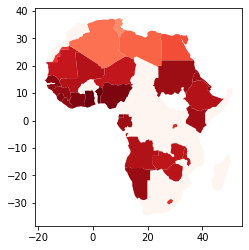

In [27]:
africa_temp
africa_temp_20130601 = africa_temp[africa_temp['dt'] == '2013-02-01'].plot(column='AverageTemperature', cmap='Reds')

In [28]:
africa_temp.to_file('../Data/vector/africa_temp.shp')

<ipython-input-28-1df39466351c>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  africa_temp.to_file('../Data/vector/africa_temp.shp')


### Spatial relations

Spatial relationships are important aspect of geospatial data if we want to know how two spatial objects relate to each other. 

<AxesSubplot:>

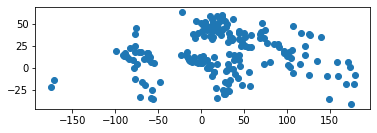

In [29]:
import geopandas as gpd
africa = gpd.read_file("../Data/vector/africa.shp")
rivers = gpd.read_file("https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/physical/ne_10m_rivers_lake_centerlines.zip")
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
cities.plot()

<AxesSubplot:>

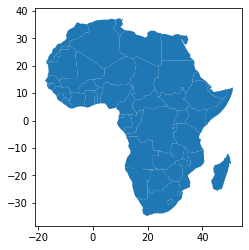

In [30]:
africa.plot()

In the next step we will clip our cities dataset to the african continent and 

<AxesSubplot:>

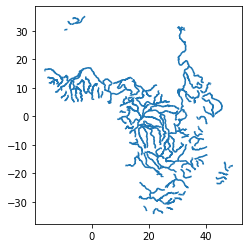

In [31]:
cities_africa = gpd.clip(cities, africa)
rivers_africa = gpd.clip(rivers, africa)
rivers_africa.plot()

### Spatial relation

In [32]:
from shapely.geometry import LineString

uganda = africa.loc[africa['name'] == 'Uganda', 'geometry'].squeeze()
kampala = cities_africa.loc[cities_africa['name'] == 'Kampala', 'geometry'].squeeze()
bamako = cities_africa.loc[cities_africa['name'] == 'Bamako', 'geometry'].squeeze()

Kampala, the capital of Uganda, is thus located within Uganda. This is a spatial relationship, and we can test this using the individual shapely geometry objects as follow:

In [33]:
kampala.within(uganda)

True

And using the reverse, Uganda contains Kampala:

In [34]:
uganda.contains(kampala)

True

Of course many other spatial relations can be tested, e.g.

In [35]:
uganda.contains(bamako)
bamako.within(uganda)

False

The same methods that are available on individual shapely geometries as we have seen above, are also available as methods on GeoSeries / GeoDataFrame objects.

In [36]:
africa.contains(kampala)
africa[africa.contains(kampala)]

pop_est continent    name iso_a3  gdp_md_est  \
48  39570125    Africa  Uganda    UGA     84930.0   

                                             geometry  
48  POLYGON ((33.90371 -0.95000, 31.86617 -1.02736...

In [37]:
rivers_africa[rivers_africa.intersects(uganda)]
rivers_africa[rivers_africa.crosses(uganda)]

dissolve  scalerank       featurecla         name name_alt  \
327   223Lake Centerline        6.0  Lake Centerline      Semliki     None   
328             223River        6.0            River      Semliki     None   
1021              6River        1.0            River       Kagera     None   
1385              9River        1.0            River  Albert Nile     None   

      rivernum  note  min_zoom     name_en  min_label  ...    name_pl  \
327        223  None       5.0     Semliki        6.0  ...    Semliki   
328        223  None       5.0     Semliki        6.0  ...    Semliki   
1021         6  None       2.0      Kagera        3.0  ...     Kagera   
1385         9  None       2.0  White Nile        3.0  ...  Nil Biały   

          name_pt    name_ru       name_sv    name_tr         name_vi name_zh  \
327          None    Семлики       Semliki       None            None   塞姆利基河   
328          None    Семлики       Semliki       None            None   塞姆利基河   
1021   Rio Kagera     Кагера  Kagerafloden       None          Kagera    卡蓋拉河   
1385  Nilo Branco  Белый Нил    Vita Nilen  Beyaz Nil  Sông Nin Trắng    白尼罗河   

     wdid_score       ne_id                                           geometry  
327           4  1159114169  MULTILINESTRING ((31.34319 2.19591, 31.32317 2...  
328           4  1159114175  MULTILINESTRING ((29.59718 -0.13421, 29.56666 ...  
1021          4  1159125959  LINESTRING (29.59352 -2.98431, 29.59531 -2.988...  
1385          5  1159129211  LINESTRING (32.01588 3.61363, 32.02288 3.58686...  

[4 rows x 35 columns]

Overview of the different functions to check spatial relationships:

- `equals`
- `contains`
- `crosses`
- `disjoint`
- `intersects`
- `overlaps`
- `touches`
- `within`
- `covers`


Shapely and GeoPandas aslo provide spatial operations that return new geometric objects.
Let's construct a buffer around Kampala:

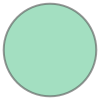

In [38]:
kampala.buffer(2)

In [39]:
gpd.GeoSeries([uganda, kampala.buffer(2)])

0    POLYGON ((33.90371 -0.95000, 31.86617 -1.02736...
1    POLYGON ((34.58138 0.31860, 34.57175 0.12257, ...
dtype: geometry

<AxesSubplot:>

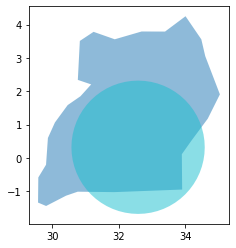

In [40]:
gpd.GeoSeries([uganda, kampala.buffer(2)]).plot(alpha=0.5, cmap='tab10')

and now take the intersection, union or difference of those two polygons:

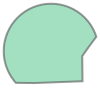

In [41]:
kampala.buffer(2).intersection(uganda)

#kampala.buffer(2).union(uganda)

#kampala.buffer(2).difference(uganda)

## Visualization

Now we know how to use geopandas it is time to create some maps. The most simple way to create a map is to used the in-built plot function

<AxesSubplot:>

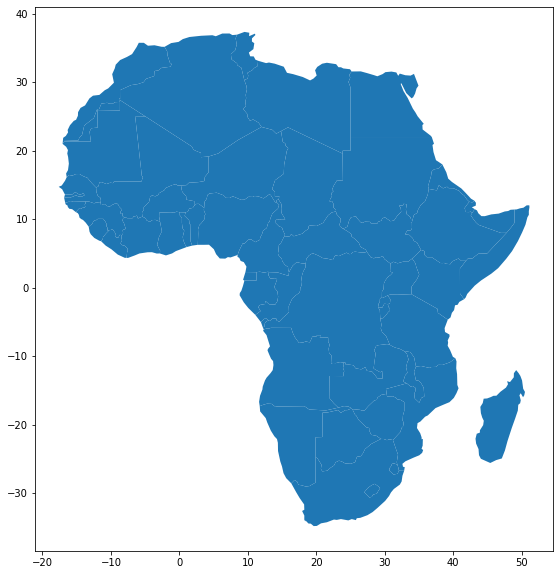

In [42]:
import geopandas as gpd

africa = gpd.read_file('../Data/vector/africa.shp')
africa.plot(figsize=(10,10))

But let's create a more advanced map. Therefor we can use the matplotlib library

In [43]:
africa

pop_est continent                  name iso_a3  gdp_md_est  \
0    53950935    Africa              Tanzania    TZA    150600.0   
1      603253    Africa             W. Sahara    ESH       906.5   
2    83301151    Africa       Dem. Rep. Congo    COD     66010.0   
3     7531386    Africa               Somalia    SOM      4719.0   
4    47615739    Africa                 Kenya    KEN    152700.0   
5    37345935    Africa                 Sudan    SDN    176300.0   
6    12075985    Africa                  Chad    TCD     30590.0   
7    54841552    Africa          South Africa    ZAF    739100.0   
8     1958042    Africa               Lesotho    LSO      6019.0   
9    13805084    Africa              Zimbabwe    ZWE     28330.0   
10    2214858    Africa              Botswana    BWA     35900.0   
11    2484780    Africa               Namibia    NAM     25990.0   
12   14668522    Africa               Senegal    SEN     39720.0   
13   17885245    Africa                  Mali    MLI     38090.0   
14    3758571    Africa            Mauritania    MRT     16710.0   
15   11038805    Africa                 Benin    BEN     24310.0   
16   19245344    Africa                 Niger    NER     20150.0   
17  190632261    Africa               Nigeria    NGA   1089000.0   
18   24994885    Africa              Cameroon    CMR     77240.0   
19    7965055    Africa                  Togo    TGO     11610.0   
20   27499924    Africa                 Ghana    GHA    120800.0   
21   24184810    Africa         Côte d'Ivoire    CIV     87120.0   
22   12413867    Africa                Guinea    GIN     16080.0   
23    1792338    Africa         Guinea-Bissau    GNB      2851.0   
24    4689021    Africa               Liberia    LBR      3881.0   
25    6163195    Africa          Sierra Leone    SLE     10640.0   
26   20107509    Africa          Burkina Faso    BFA     32990.0   
27    5625118    Africa  Central African Rep.    CAF      3206.0   
28    4954674    Africa                 Congo    COG     30270.0   
29    1772255    Africa                 Gabon    GAB     35980.0   
30     778358    Africa            Eq. Guinea    GNQ     31770.0   
31   15972000    Africa                Zambia    ZMB     65170.0   
32   19196246    Africa                Malawi    MWI     21200.0   
33   26573706    Africa            Mozambique    MOZ     35010.0   
34    1467152    Africa              eSwatini    SWZ     11060.0   
35   29310273    Africa                Angola    AGO    189000.0   
36   11466756    Africa               Burundi    BDI      7892.0   
37   25054161    Africa            Madagascar    MDG     36860.0   
38    2051363    Africa                Gambia    GMB      3387.0   
39   11403800    Africa               Tunisia    TUN    130800.0   
40   40969443    Africa               Algeria    DZA    609400.0   
41    5918919    Africa               Eritrea    ERI      9169.0   
42   33986655    Africa               Morocco    MAR    282800.0   
43   97041072    Africa                 Egypt    EGY   1105000.0   
44    6653210    Africa                 Libya    LBY     90890.0   
45  105350020    Africa              Ethiopia    ETH    174700.0   
46     865267    Africa              Djibouti    DJI      3345.0   
47    3500000    Africa            Somaliland    -99     12250.0   
48   39570125    Africa                Uganda    UGA     84930.0   
49   11901484    Africa                Rwanda    RWA     21970.0   
50   13026129    Africa              S. Sudan    SSD     20880.0   

                                             geometry  
0   POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
1   POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
2   POLYGON ((29.34000 -4.49998, 29.51999 -5.41998...  
3   POLYGON ((41.58513 -1.68325, 40.99300 -0.85829...  
4   POLYGON ((39.20222 -4.67677, 37.76690 -3.67712...  
5   POLYGON ((24.56737 8.22919, 23.80581 8.66632, ...  
6   POLYGON ((23.83766 19.58047, 23.88689 15.61084...  
7   POLYGON ((16.3449

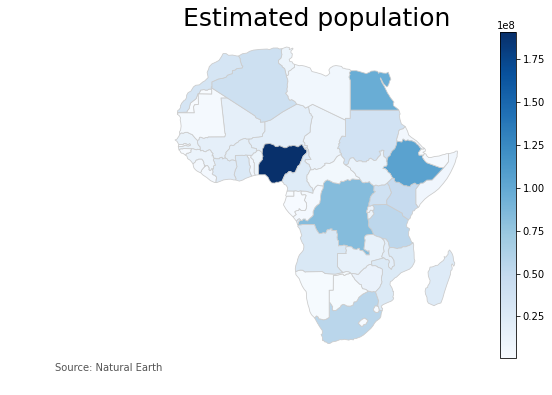

In [44]:
import matplotlib.pyplot as plt

# set the range for the choropleth
vmin, vmax = africa.pop_est.min() , africa.pop_est.max()

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

# create map
africa.plot(column='pop_est', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# remove the axis
ax.axis('off')

# add a title
ax.set_title('Estimated population', \
              fontdict={'fontsize': '25',
                        'fontweight' : '3'})

# create an annotation for the  data source
ax.annotate('Source: Natural Earth',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

# this will save the figure as a high-res png. you can also save as svg
fig.savefig('testmap.png', dpi=300)

Let's have a look at different maps we can produce with python



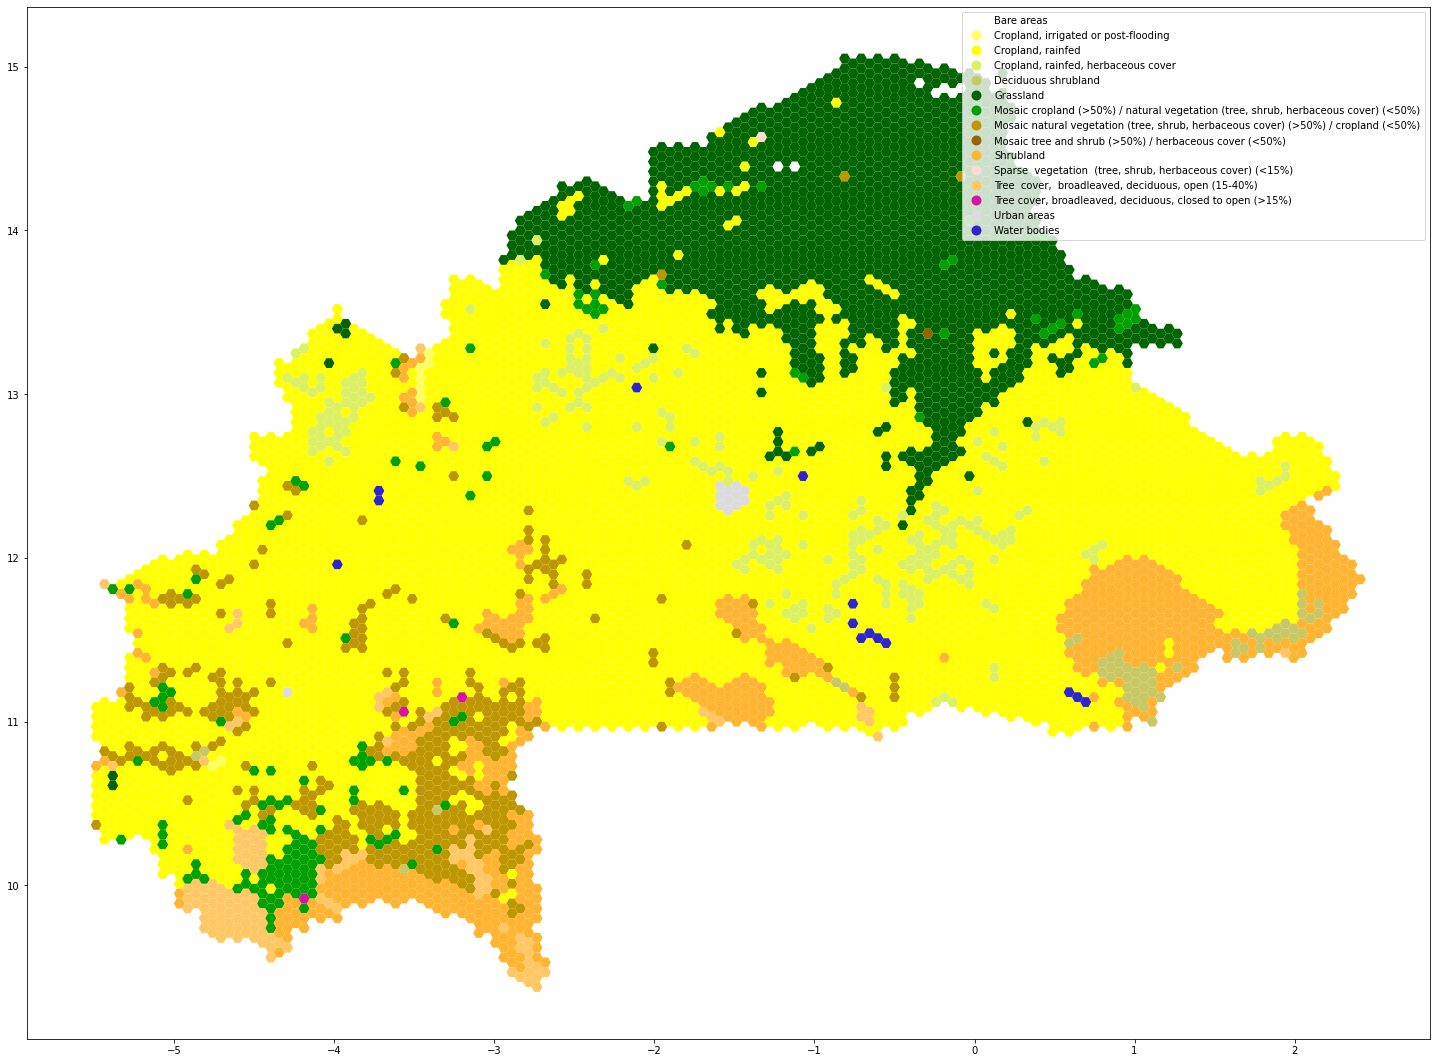

In [45]:
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt

lcc = gpd.read_file('../Data/vector/lcc_burkina_2018_hex.shp')

flag_info_uni = [('0', '#ffffff'),('10', '#ffff64'),('11', '#ffff00'),('20', '#dcf064'),('30', '#c8c864'),('40', '#006400'),('60', '#00a000'),('62', '#003c00'),('100', '#be9600'),('120', '#966400'),
 ('122', '#ffb432'),('130', '#ffdcd2'),('150', '#ffc864'),('190', '#d911a7'),('200', '#dcdcdc'),('210', '#2e25cc')]

cci_cmap_uni = matplotlib.colors.ListedColormap([i[1] for i in flag_info_uni], name='CCIuni')

leg_dict = {'0': 'No Data', '10': 'Cropland, rainfed', '11': 'Cropland, rainfed, herbaceous cover', '20': 'Cropland, irrigated or post-flooding', '30': 'Mosaic cropland (>50%) / natural vegetation (tree, shrub, herbaceous cover) (<50%)', '40': 'Mosaic natural vegetation (tree, shrub, herbaceous cover) (>50%) / cropland (<50%)', '60': 'Tree cover, broadleaved, deciduous, closed to open (>15%)', '62': 'Tree  cover,  broadleaved, deciduous, open (15-40%)', '100': 'Mosaic tree and shrub (>50%) / herbaceous cover (<50%)', '120': 'Shrubland', '122': 'Deciduous shrubland', '130': 'Grassland', '150': 'Sparse  vegetation  (tree, shrub, herbaceous cover) (<15%)', '190': 'Urban areas', '200': 'Bare areas', '210': 'Water bodies', -10: 'nan'}
lcc['lulc_cla_4'] = lcc['lulc_cla_4'].astype(str)
lcc['lulc_cla_4']= lcc['lulc_cla_4'].map(leg_dict)

fig, ax = plt.subplots(figsize=(20,15))
lcc.plot(column='lulc_cla_4', cmap=cci_cmap_uni,ax=ax, categorical=True, legend=True)

plt.tight_layout()

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

/home/wascal/.local/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/wascal/.local/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/home/wascal/.local/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/wascal/.local/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attrib

:Overlay
   .Ocean.I     :Feature   [Longitude,Latitude]
   .Coastline.I :Feature   [Longitude,Latitude]
   .Land.I      :Feature   [Longitude,Latitude]
   .Polygons.I  :Polygons   [Longitude,Latitude]   (pop_quant)
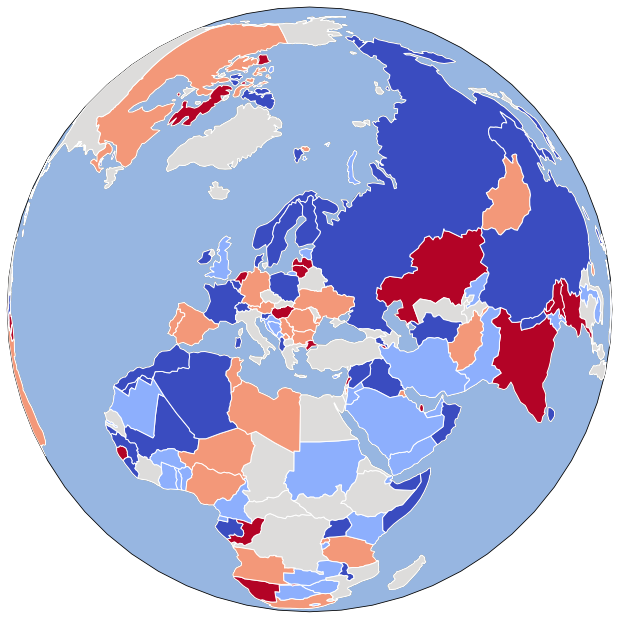

In [46]:
import numpy as np
import pandas as pd
import geoviews as gv
import geoviews.feature as gf
from geoviews import opts, tile_sources as gvts
import cartopy.crs as ccrs

import matplotlib.pyplot as plt
%matplotlib inline
import mapclassify as mc
import geopandas as gpd
gv.extension('matplotlib')

gv.output(fig='png', size=300)

earth_df = gpd.read_file(
        gpd.datasets.get_path('naturalearth_lowres')
    )

quant = mc.BoxPlot(earth_df['pop_est'].values)
quant

earth_df['pop_quant'] = earth_df[['pop_est']].apply(quant)

eart_polyview = gv.Polygons(
    earth_df, vdims=['pop_quant']
).opts( projection=ccrs.Orthographic(27, 48) )



# test geoviews orthographic view
img = gf.ocean * gf.coastline * gf.land * eart_polyview.opts(
    projection=ccrs.Orthographic(27, 48), global_extent=True, edgecolor='white',
    xaxis=None, yaxis=None, show_grid=False,
    show_frame=False, colorbar=False, fig_size=300, color='pop_quant', cmap='coolwarm' )
img

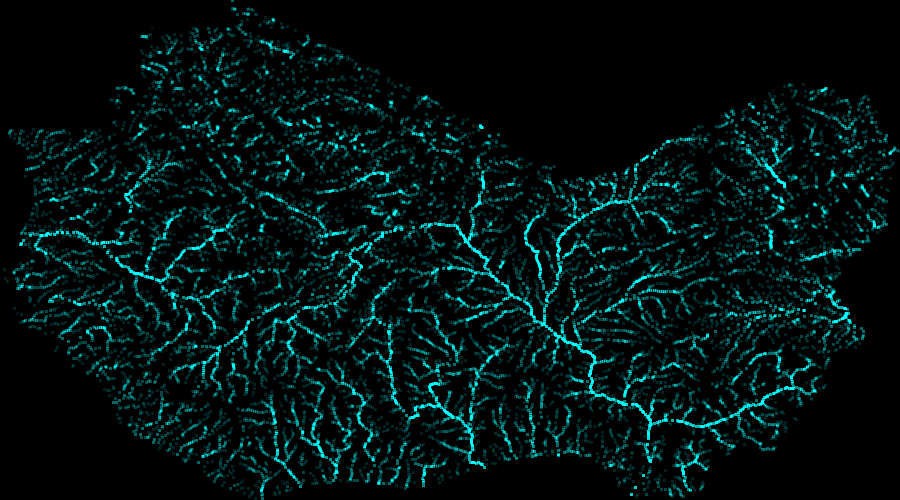

In [48]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datashader as ds
import datashader.transfer_functions as tf
from functools import partial
from datashader.utils import export_image
from datashader.colors import colormap_select, Hot, viridis

rivers = gpd.read_file('../Data/vector/wca_streams.shp')
rivers['cent_x'] = rivers['geometry'].apply(lambda x: x.centroid.x)
rivers['cent_y'] = rivers['geometry'].apply(lambda x: x.centroid.y)

background = 'black'

export = partial(export_image, background = background, export_path=".")

cm = partial(colormap_select, reverse=False)

w = 900
h = 500
cvs = ds.Canvas(plot_width=w, plot_height=h)
agg = cvs.points(rivers, 'cent_x', 'cent_y', ds.mean('A_Strahler'))
shaded = tf.shade(agg, cmap=cm(['cyan','black'], False), how='linear', alpha=210, min_alpha=150)
img_dyn = tf.spread(shaded, px=1, how='add')
img = tf.set_background(img_dyn, background)
img


## Interactive web-based visualizations

Another popular javascript library for online maps is Leaflet.js, and this has python bindings in the folium and ipyleaflet packages. We basically give it minimal instructions, JS does loads of work in the background and we get some very, very cool maps. 

In [49]:
import ipyleaflet

m = ipyleaflet.Map(center=[0, 0], zoom=2)

layer = ipyleaflet.GeoJSON(data=africa.__geo_interface__)
m.add_layer(layer)
m

Map(center=[0, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text'…

In [50]:
from ipyleaflet import Map, basemaps, basemap_to_tiles

m = ipyleaflet.Map(center=[0, 0], zoom=2, basemap=basemap_to_tiles(basemaps.NASAGIBS.ModisTerraTrueColorCR, "2020-04-08"))

layer = ipyleaflet.GeoJSON(data=africa.__geo_interface__)
m.add_layer(layer)
m

Map(center=[0, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text'…

In [51]:
import folium

m = folium.Map([0, 0], zoom_start=2, tiles="OpenStreetMap")
folium.Choropleth(geo_data=africa, data=africa, columns=['name', 'pop_est'],
             key_on='feature.properties.name', fill_color='BuGn', highlight=True).add_to(m)
m

Of course there are also other very nice python packages for interactive data visualization

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
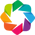

:Polygons   [Longitude,Latitude]   (name,pop_est)

In [53]:
import geoviews as gv
from geoviews import opts
from cartopy import crs as ccrs
gv.extension('bokeh')

gdf = gpd.read_file('../Data/vector/ne_110m_admin_0_countries.shp')[['ADMIN', 'ADM0_A3', 'geometry']]
gdf.columns = ['country', 'country_code', 'geometry']
df = pd.read_csv('../Data/non-spatial/Land_surface_temperature_anomaly.csv')
merged = gdf.merge(df, left_on = 'country', right_on = 'Entity', how = 'left')

gv.Polygons(africa, vdims=['name', 'pop_est'], label='Population by country').opts(
    tools=['hover'], width=550, height=600, color='pop_est',
    colorbar=True, toolbar='above', xaxis=None, yaxis=None)

## Example: Interpolation

In [58]:
import geopandas as gpd
import matplotlib.pyplot as plt
import mplleaflet
import numpy as np
from scipy.interpolate import griddata
from shapely.geometry import shape

ws = gpd.read_file('../Data/vector/weather_stations/weather.shp')
ws

STNID  mean_temp                   geometry
0   653060-99999  26.950000   POINT (2.93300 11.13300)
1   653190-99999  25.520000   POINT (1.38300 10.31700)
2   653300-99999  25.396667    POINT (2.61700 9.35000)
3   653350-99999  25.826667    POINT (2.46700 8.03300)
4   653380-99999  25.520000    POINT (2.06700 7.16700)
5   653440-99999  26.453333    POINT (2.38400 6.35700)
6   653520-99999  27.117241   POINT (0.46700 10.36700)
7   653550-99999  25.560000    POINT (1.09100 9.76700)
8   653570-99999  26.071429    POINT (1.16700 9.55000)
9   653610-99999  25.193333    POINT (1.15000 8.98300)
10  653760-99999  25.017241    POINT (1.11700 7.58300)
11  653765-99999  26.532143   POINT (0.25000 10.80000)
12  653800-99999  26.792593    POINT (1.50000 6.58300)
13  653870-99999  26.483333    POINT (1.25500 6.16600)
14  654010-99999  27.369231  POINT (-1.10000 10.90000)
15  654040-99999  26.653333  POINT (-2.50800 10.08300)
16  654160-99999  25.524138   POINT (-2.48300 9.03300)
17  654180-99999  27.420690   POINT (-0.86300 9.55700)
18  654200-99999  26.537931   POINT (-0.01700 9.45000)
19  654320-99999  25.186207   POINT (-2.10000 7.75000)
20  654370-99999  26.725926   POINT (-0.03300 7.81700)
21  654390-99999  25.336667   POINT (-2.32900 7.36200)
22  654420-99999  25.963333   POINT (-1.59100 6.71500)
23  654450-99999  26.240000   POINT (-2.33300 6.20000)
24  654500-99999  23.910345   POINT (-0.75000 6.66700)
25  654530-99999  26.410714    POINT (0.46700 6.60000)
26  654570-99999  26.552632   POINT (-0.98300 5.93300)
27  654590-99999  26.053333   POINT (-0.25000 6.08300)
28  654600-99999  27.374074    POINT (0.11700 6.10000)
29  654620-99999  26.365517    POINT (0.80000 6.11700)
30  654650-99999  26.200000   POINT (-2.23300 4.86700)
31  654670-99999  26.500000   POINT (-1.77500 4.89600)
32  654690-99999  26.093333   POINT (-1.06700 5.20000)
33  654720-99999  26.300000   POINT (-0.16700 5.60500)
34  654750-99999  26.942857    POINT (0.63300 5.78300)
35  655010-99999  30.714286  POINT (-0.03300 14.03300)
36  655020-99999  28.400000  POINT (-2.41700 13.56700)
37  655030-99999  28.073333  POINT (-1.51200 12.35300)
38  655050-99999  27.663333  POINT (-3.48300 12.46700)
39  655070-99999  27.656667   POINT (0.36700 12.03300)
40  655100-99999  26.116667  POINT (-4.33100 11.16000)
41  655160-99999  27.213333  POINT (-2.93300 11.75000)
42  655180-99999  26.370000  POINT (-1.15000 11.15000)
43  655220-99999  26.641379  POINT (-3.18300 10.33300)
44  655280-99999  25.025000   POINT (-7.56700 9.50000)
45  655360-99999  24.885714   POINT (-5.55700 9.38700)
46  655450-99999  24.948148   POINT (-2.78300 8.05000)
47  655480-99999  25.003704   POINT (-7.58700 7.27200)
48  655550-99999  24.616667   POINT (-5.07400 7.73900)
49  655570-99999  26.103571   POINT (-5.95000 6.13300)
50  655600-99999  25.814286   POINT (-6.47300 6.79300)
51  655620-99999  26.585714   POINT (-4.70000 6.65000)
52  655630-99999  25.743333   POINT (-5.36600 6.90300)
53  655780-99999  25.893333   POINT (-3.92600 5.26100)
54  655850-99999  25.439286   POINT (-3.30000 5.30000)
55  655920-99999  25.361538   POINT (-7.36700 4.41700)
56  655940-99999  25.382143   POINT (-6.66100 4.74700)
57  655990-99999  25.503704   POINT (-6.08300 4.95000)

In [59]:
%matplotlib inline

ax = ws.plot(column='mean_temp', cmap='RdBu_r')
mplleaflet.display(fig=ax.figure, tiles='cartodb_positron')

/home/wascal/.local/lib/python3.8/site-packages/mplleaflet/mplexporter/exporter.py:263: MatplotlibDeprecationWarning: 
The get_offset_position function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  offset_order = offset_dict[collection.get_offset_position()]
/usr/lib/python3/dist-packages/IPython/core/display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [60]:
ws['x'] = ws['geometry'].apply(lambda x: x.x)
ws['y'] = ws['geometry'].apply(lambda x: x.y)

In [64]:
numcols, numrows = 1000, 1000
xi = np.linspace(ws['x'].min(), ws['x'].max(), numcols)
yi = np.linspace(ws['y'].min(), ws['y'].max(), numrows)

xi, yi = np.meshgrid(xi, yi)
x, y, z = ws['x'].values, ws['y'].values, ws['mean_temp'].values
points = np.column_stack((x,y))
zi = griddata(points, z, (xi, yi), method='cubic')

<Figure size 432x288 with 0 Axes>

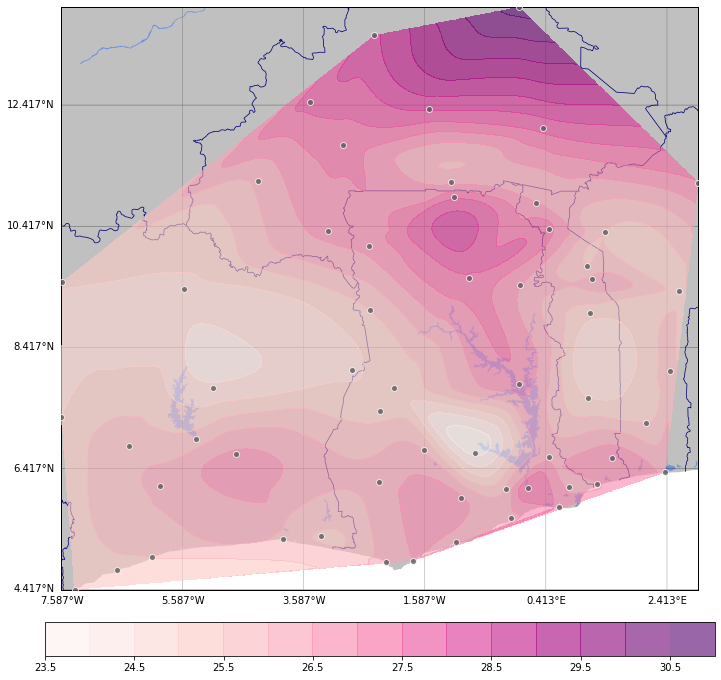

In [65]:
from mpl_toolkits.basemap import Basemap, interp

# define map extent
lllon = ws['x'].min()
lllat = ws['y'].min()
urlon = ws['x'].max()
urlat = ws['y'].max()

# set up Basemap instance
m = Basemap(
    epsg='4326',
    llcrnrlon = lllon, llcrnrlat = lllat, urcrnrlon = urlon, urcrnrlat = urlat,
    resolution='h')


# set up plot
plt.clf()
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111,  frame_on=False)

# draw map details
m.drawmapboundary(fill_color = 'white', ax=ax)
m.fillcontinents(color='#C0C0C0', lake_color='#7093DB', ax=ax)
m.drawcountries(
    linewidth=.75, linestyle='solid', color='#000073',
    antialiased=True,
    ax=ax, zorder=3)

m.drawparallels(
    np.arange(lllat, urlat, 2.),
    color = 'black', linewidth = 0.5,
    labels=[True, False, False, False], ax=ax)

m.drawmeridians(
    np.arange(lllon, urlon, 2.),
    color = '0.25', linewidth = 0.5,
    labels=[False, False, False, True], ax=ax)

# contour plots
# con = m.contour(xi, yi, zi, 15, zorder=4, linewidths=.25, linestyles='dashed', colors='k', alpha=0.6, ax=ax)
conf = m.contourf(xi, yi, zi, 15, zorder=4, alpha=0.6, cmap='RdPu', ax=ax)

# scatter plot - vmin/max for colormap compat
m.scatter(
    ws['x'],
    ws['y'],
    color='#545454',
    edgecolor='#ffffff',
    alpha=.75,
    cmap='RdPu',
    ax=ax,
    vmin=zi.min(), vmax=zi.max(), zorder=5)

# add colour bar, title, and scale
cbar = plt.colorbar(conf, orientation='horizontal', fraction=.057, pad=0.05)

plt.show()

## Example: Spatial autocorrelation of the Plasmodium falciparum parasite rate 

Let’s say we are interested in spatial autocorrelation of the Plasmodium falciparum parasite rate (PfPR)  in the different departments of Burkina Faso. If there were spatial autocorrelation, regions of a similar PfPR would be spatially clustered.

<AxesSubplot:>

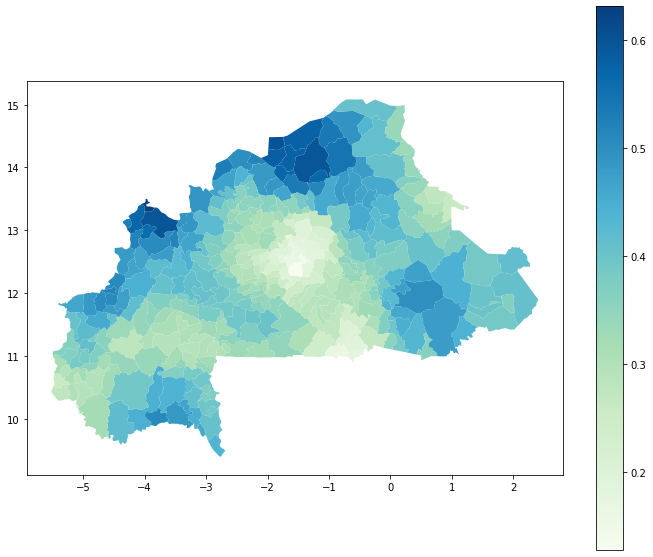

In [14]:
import geopandas as gpd
import matplotlib.pyplot as plt

bfa = gpd.read_file('../Data/vector/burkina/bfa.shp')
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
bfa.plot(column='_pfprmean',  k=5, cmap='GnBu', legend=True, ax=ax)

In [15]:
import libpysal as lps
gdf = bfa
wq =  lps.weights.Queen.from_dataframe(gdf)
wq

In [17]:
wq.transform = 'r'
y = gdf['_pfprmean']

In [18]:
from esda.moran import Moran

moran = Moran(y, wq)
moran.I

0.8799958278606206

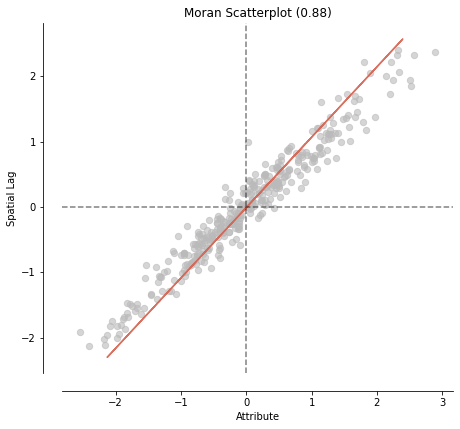

In [19]:
from splot.esda import moran_scatterplot
fig, ax = moran_scatterplot(moran, aspect_equal=True)
plt.show()

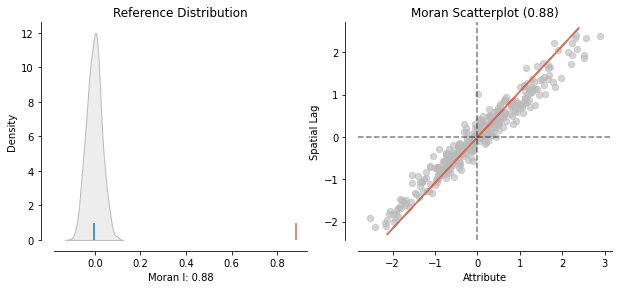

In [20]:
from splot.esda import plot_moran

plot_moran(moran, zstandard=True, figsize=(10,4))
plt.show()

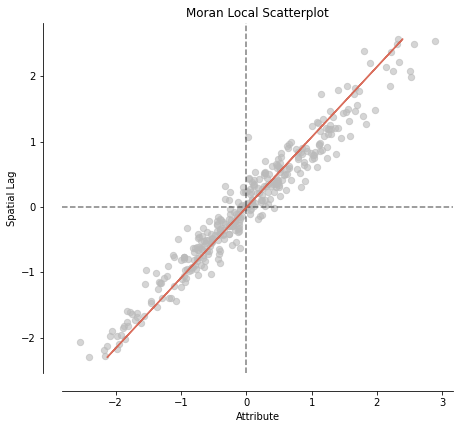

In [21]:
from splot.esda import moran_scatterplot
from esda.moran import Moran_Local

# calculate Moran_Local and plot
moran_loc = Moran_Local(y, wq)
fig, ax = moran_scatterplot(moran_loc)
ax.set_ylabel('Spatial Lag')
plt.show()

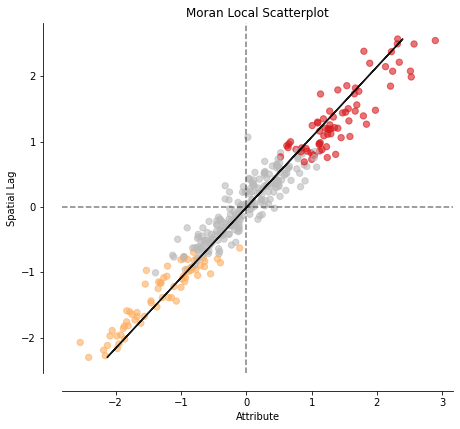

In [22]:
fig, ax = moran_scatterplot(moran_loc, p=0.05)
ax.set_ylabel('Spatial Lag')
plt.show()


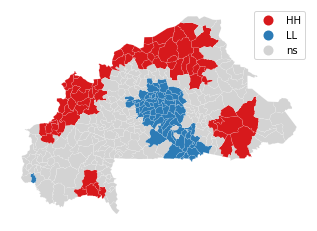

In [23]:
from splot.esda import lisa_cluster

lisa_cluster(moran_loc, gdf, p=0.05)
plt.show()

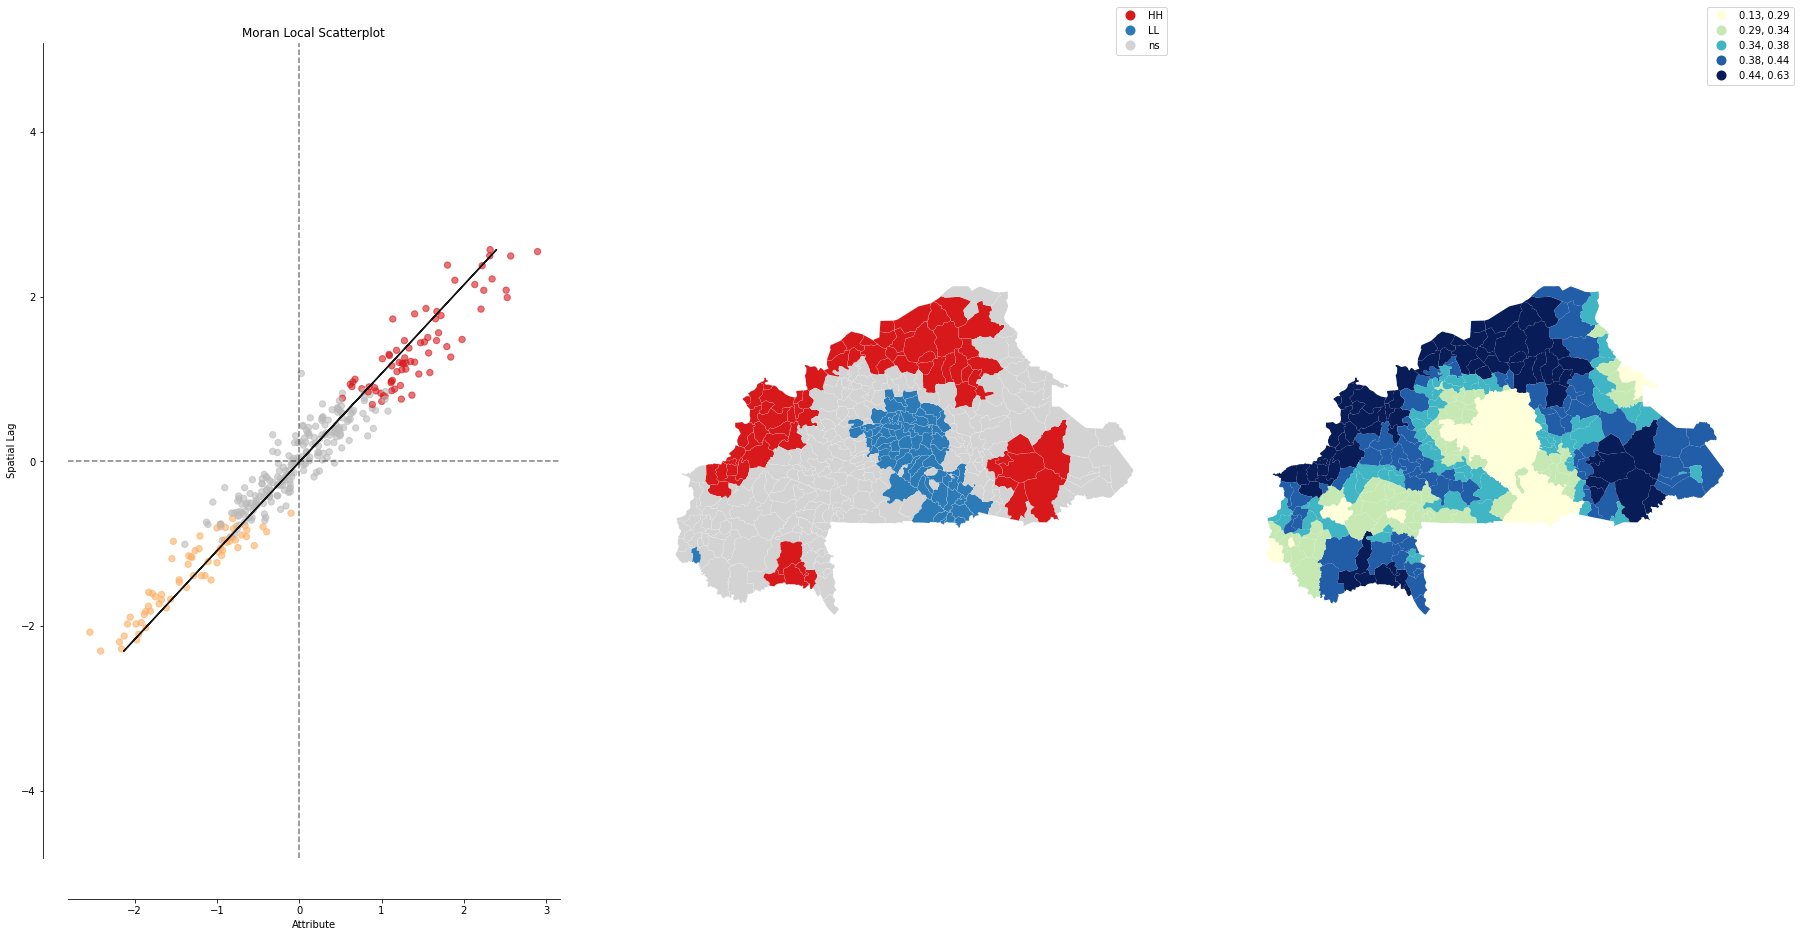

In [24]:
from splot.esda import plot_local_autocorrelation

plot_local_autocorrelation(moran_loc, gdf, '_pfprmean', figsize=(30,15))
plt.show()

### Additional Content:  OpenStreetMap 

In [1]:
from pyrosm import OSM
from pyrosm import get_data
import geopandas as gpd
import pandas as pd
import shapely

/usr/local/lib/python3.8/dist-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
wue = gpd.read_file('../Data/vector/wuerzburg/altstadt.shp')
altstadt = wue[wue['stadtbezir']=="Altstadt"]
altstadt

stadtbezir nummer einwohner  \
3   Altstadt     01     18768   

                                            geometry  
3  POLYGON ((9.95188 49.79652, 9.95182 49.79638, ...

In [3]:
fp = get_data("Wuerzburg")
bbox_geom = altstadt['geometry'].values[0]
osm = OSM(fp, bounding_box=bbox_geom)
print("Type of 'osm' instance: ", type(osm))

Type of 'osm' instance:  <class 'pyrosm.pyrosm.OSM'>


<AxesSubplot:>

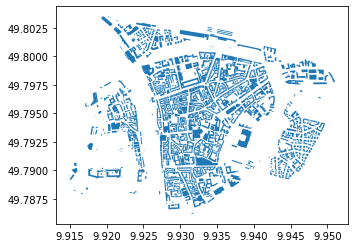

In [6]:
buildings = osm.get_buildings()
buildings.plot()

<AxesSubplot:>

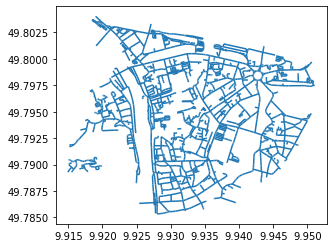

In [7]:
drive_net = osm.get_network(network_type="driving")
drive_net.plot()

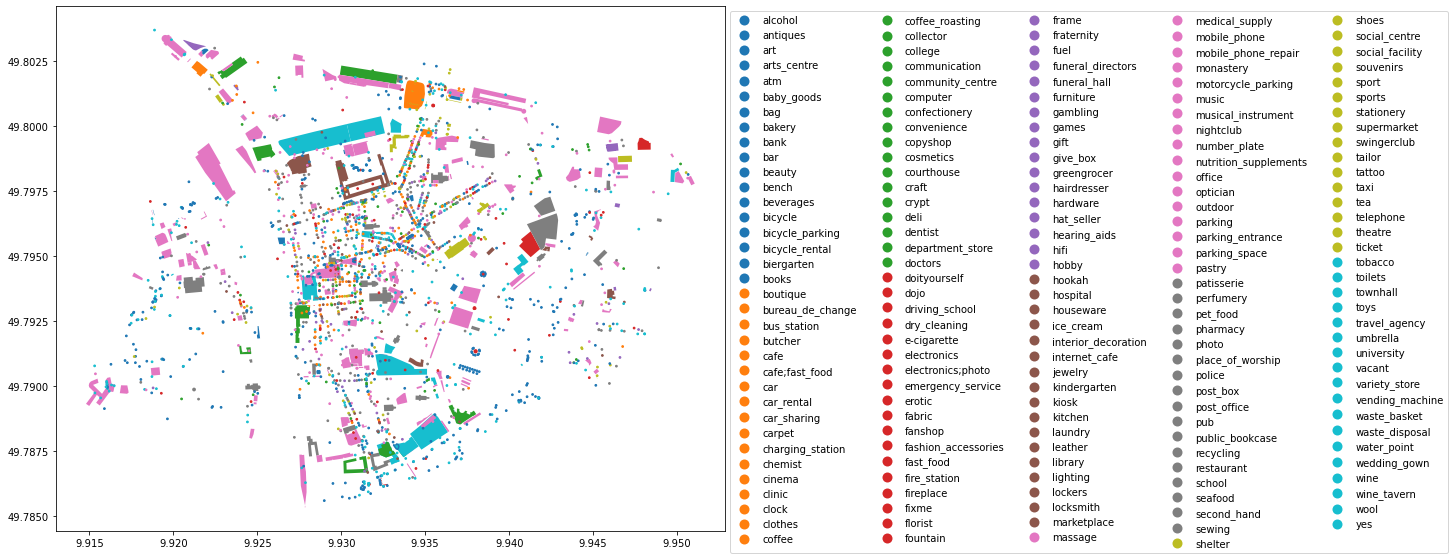

In [8]:
custom_filter = {'amenity': True, "shop": True}
pois = osm.get_pois(custom_filter=custom_filter)

# Gather info about POI type (combines the tag info from "amenity" and "shop")
pois["poi_type"] = pois["amenity"]
pois["poi_type"] = pois["poi_type"].fillna(pois["shop"])

# Plot
ax = pois.plot(column='poi_type', markersize=3, figsize=(12,12), legend=True, legend_kwds=dict(loc='upper left', ncol=5, bbox_to_anchor=(1, 1)))


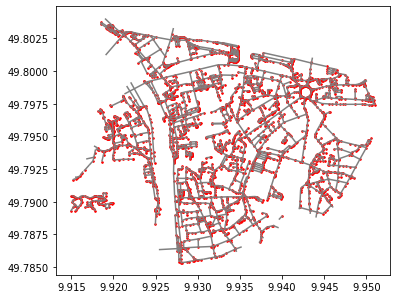

In [10]:
bbox_geom = altstadt['geometry'].values[0]
osm = OSM(fp, bounding_box=bbox_geom)
nodes, edges = osm.get_network(nodes=True, network_type="driving")
ax = edges.plot(figsize=(6,6), color="gray")
ax = nodes.plot(ax=ax, color="red", markersize=2.5)

In [11]:
import osmnx as ox
import networkx as nx

G = osm.to_graph(nodes, edges, graph_type="networkx")
source_address = "Bahnhofstraße 1, Wuerzburg"
target_address = "Sanderstraße 3, Wuerzburg"

source = ox.geocode(source_address)
target = ox.geocode(target_address)
source_node = ox.get_nearest_node(G, source)
target_node = ox.get_nearest_node(G, target)


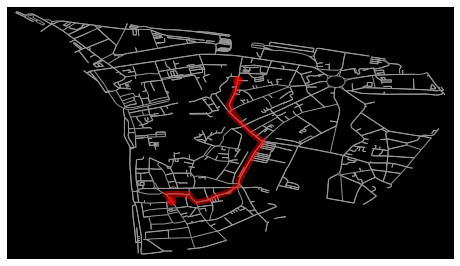

In [12]:
route = nx.shortest_path(G, source_node, target_node, weight="length")
fig, ax = ox.plot_graph_route(G, route, route_linewidth=6, node_size=0, bgcolor='k')


## Exercise

- Import the datasets_105806_252067_stations.csv (Data/non-spatial)dataset and create a GeoPandasDataFrame (Hint: don't forget to set the CRS)
- How many features are there in the dataset? 
- Make a quick plot of the stations dataset.
- Create a nice map of all bike stations in London 
- Make a histogram showing the distribution of capacities in the stations
- Create a spatial point object with the coordinates of the Big Ben
- Import the london_boroughs dataset (Data/vector)
- Check if the Big Ben is located within Westminster
- How many bike stations are in Westminster
- Determine for each bike station in which borough it is located
- Create a map showing the bike station density in each district
- Calculate the distance to the Big Ben for each station
- Print the distance and the name of the closest station
- Create a plot with the Big Ben and all the stations where the distance to the Big Ben is less than 1 km. Colorize each station depending on thier distance to the Big Ben

Additional execises:

- Import the journey dataset journeys.csv
- How long took the longest journey
- At which station did the traveller start his/her journey and at which station did it end
- Calculate the distance between these stations
- Use the osmnx and try to download a street network for London
- Make a map showing the the streets of london and the 2 bike stations 
- Calculate the shortest path between the 2 stations
- Use the map from above and add the shortest route 